In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Load the dataset
df = pd.read_csv('C:\\Users\\ESHOP\\Documents\\Kaggle Practice Project\\Datasets\\forestfires.csv')

# EDA: Check for missing values and general info
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB
None
X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


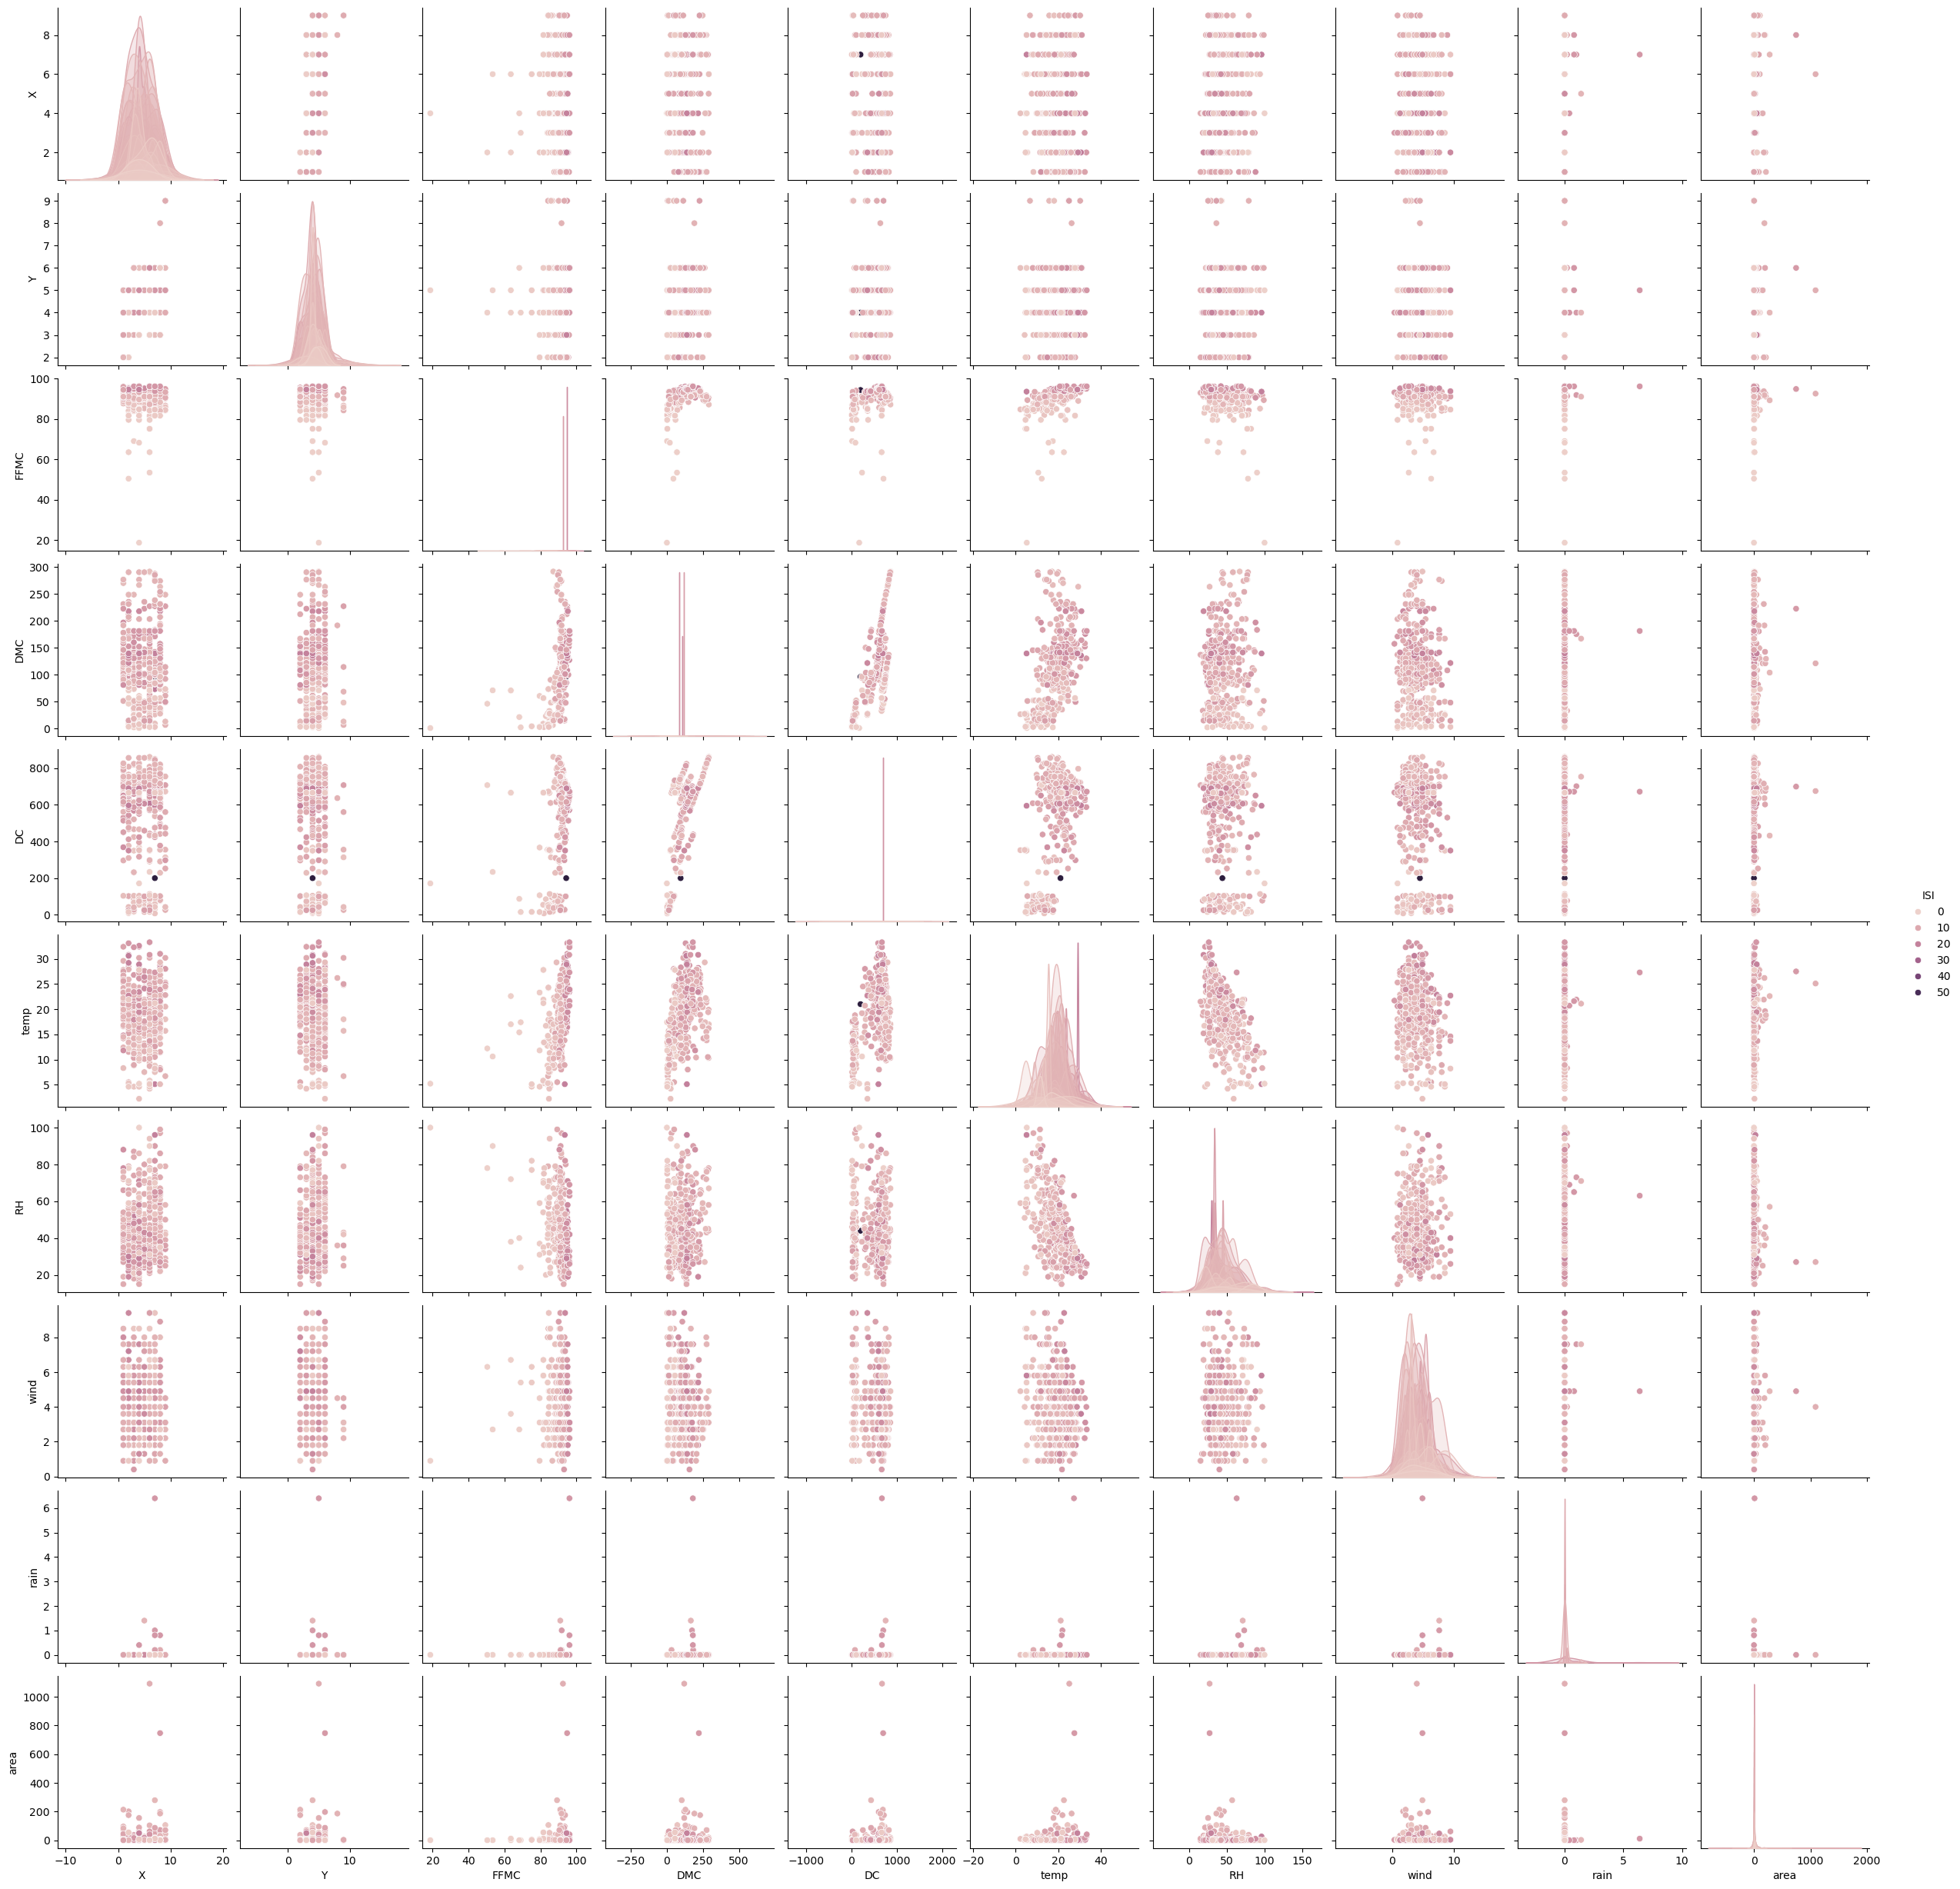

In [6]:
# Visualizing the data
sns.pairplot(df, hue='ISI')

# Feature and target variables
X = df.drop('ISI', axis=1)  
y = df['RH']

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle non-numeric columns: Check for non-numeric columns
print(X_train.dtypes)

# Option 1: Drop non-numeric columns 
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])

# Now you can apply StandardScaler since we only have numeric data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object


In [ ]:
# Model: Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3)
grid_search.fit(X_train_scaled, y_train)

# Best Model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Train the model
best_rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = best_rf_model.predict(X_test_scaled)

d:\anaconda\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

          19       0.00      0.00      0.00         1
          21       0.50      1.00      0.67         1
          22       1.00      1.00      1.00         1
          24       0.75      0.75      0.75         4
          25       0.67      1.00      0.80         2
          26       0.00      0.00      0.00         2
          27       0.86      1.00      0.92         6
          28       0.50      1.00      0.67         1
          29       1.00      0.33      0.50         3
          30       1.00      0.50      0.67         2
          31       0.00      0.00      0.00         0
          32       0.00      0.00      0.00         2
          33       0.60      0.50      0.55         6
          34       0.80      0.80      0.80         5
          35       0.50      1.00      0.67         2
          36       1.00      1.00      1.00         1
          37       1.00      1.00      1.00         2
    

d:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricW

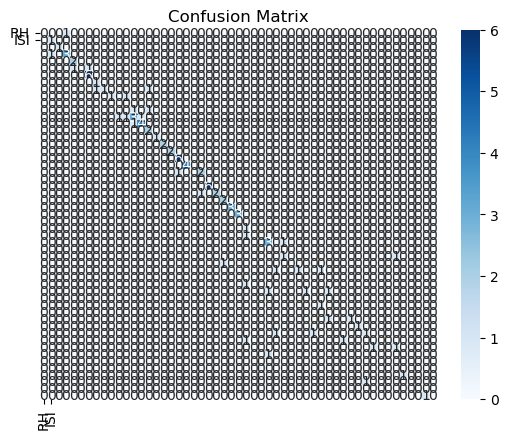

In [10]:
# Evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['RH', 'ISI'], yticklabels=['RH', 'ISI'])
plt.title('Confusion Matrix')
plt.show()

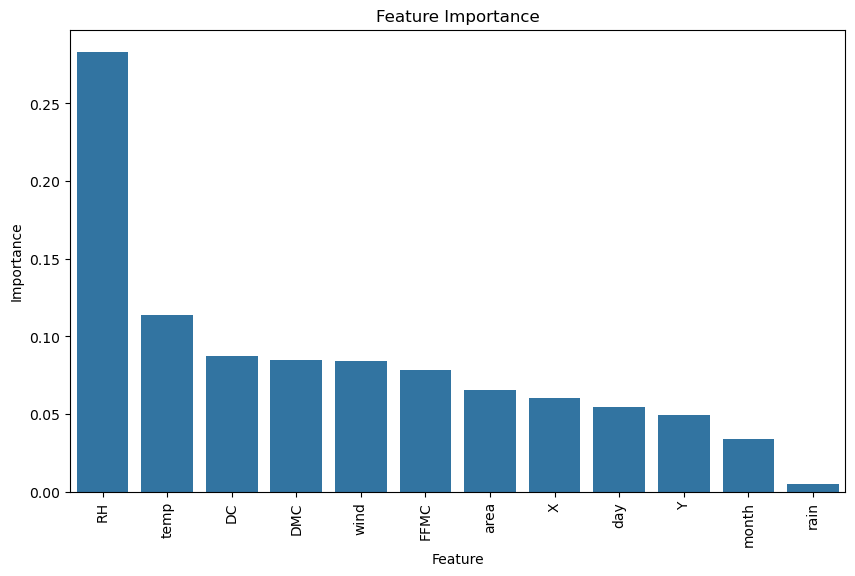

In [ ]:
# Encode categorical variables
X_encoded = X.copy()
for col in X_encoded.columns:
    if X_encoded[col].dtype == 'object':  
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X_encoded[col])

# Now define and train the model
model = RandomForestClassifier()
model.fit(X_encoded, y)

# Access feature importances if needed
feature_importance = model.feature_importances_


# Ensure 'features' and 'feature_importance' have the same length
features = X.columns

# Make sure the lengths match
if len(features) != len(feature_importance):
    raise ValueError("The length of features and feature_importance do not match.")

# Create a DataFrame for easier plotting
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})

# Sort the values by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Importance', data=feature_importance_df)
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()


